In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(f'Train has {train.shape[0]} columns and {train.shape[1]} rows')
print(f'Test has {test.shape[0]}  columns and {test.shape[1]} rows')

Train has 1460 columns and 81 rows
Test has 1459  columns and 80 rows


In [6]:
print(f'The data types in train: {train.get_dtype_counts()}')
print (f'The data types in Test: {test.get_dtype_counts()}')

The data types in train: float64     3
int64      35
object     43
dtype: int64
The data types in Test: float64    11
int64      26
object     43
dtype: int64


In [7]:
#Saving the test and train id
TestID=test['Id']
TrainID=train['Id']

In [8]:
#Dropping the test and Train Id
test.drop('Id',axis=1,inplace=True)
train.drop('Id',axis=1,inplace=True)
#Test and Train sizes after dropping IDS
print('Train size after dropping Id feature:{}'.format(train.shape))
print('Test size after dropping Id feature:{}'.format(test.shape))

Train size after dropping Id feature:(1460, 80)
Test size after dropping Id feature:(1459, 79)


# Data preprocessing

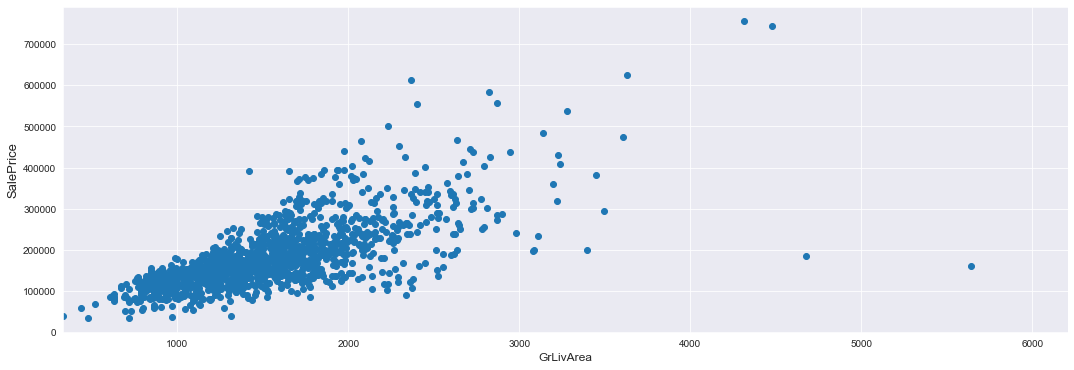

In [9]:
fig,ax=plt.subplots(figsize=(18,6))
plt.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlim(train.GrLivArea.min(),train.GrLivArea.max()*1.1)
plt.xlabel('GrLivArea',fontsize=12)
plt.ylabel('SalePrice',fontsize=13)
plt.show()


Dropping outliers from the Train dataset

In [10]:
train=train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)


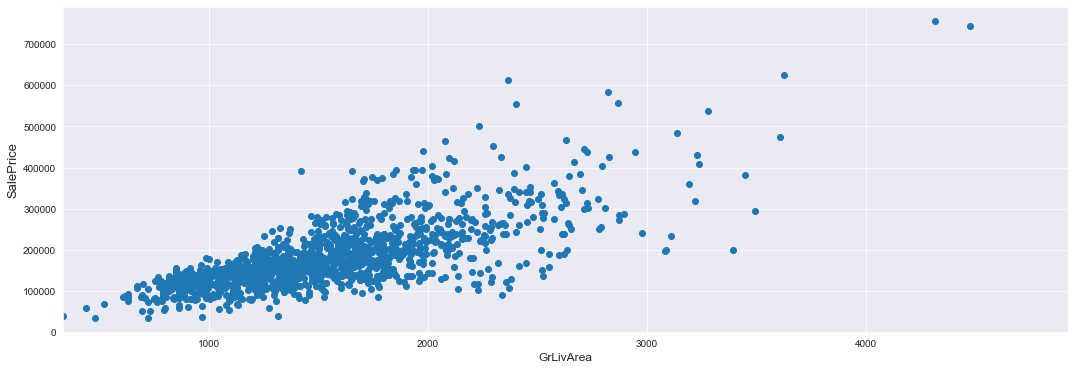

In [11]:
#plotting after dropping the outliers
fig,ax=plt.subplots(figsize=(18,6))
plt.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlim(train.GrLivArea.min(),train.GrLivArea.max()*1.1)
plt.xlabel('GrLivArea',fontsize=12)
plt.ylabel('SalePrice',fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



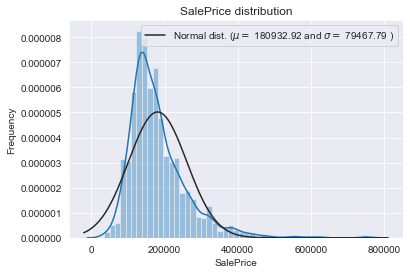

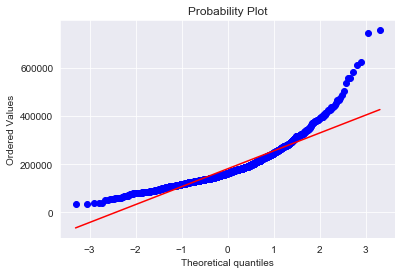

In [12]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



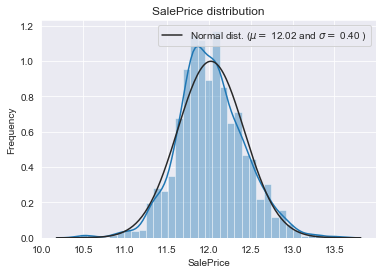

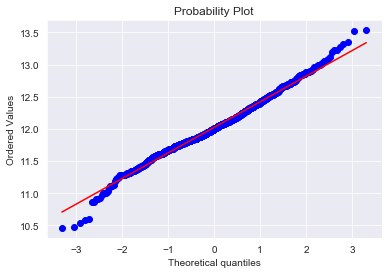

In [13]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [14]:
#concatenating the Train and the Test Data
all_data=pd.concat([train,test])
ytrain=train.SalePrice.values
all_data.drop('SalePrice',axis=1,inplace=True)

In [15]:
print('The size of train data:{}'.format(train.shape[0]))
print('The size of test data:{}'.format(test.shape[0]))
print('The size of all_data is:{}'.format(all_data.shape[0]))

The size of train data:1458
The size of test data:1459
The size of all_data is:2917


In [16]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


#Missing data

In [17]:
all_data_na=all_data.isnull().sum()/len(all_data)*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na=pd.DataFrame({'Missing portion':all_data_na})
all_data_na

,Missing portion
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


In [18]:
#LotFrontage: Linear feet of street connected to property
all_data['LotFrontage']=all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())


# imputing of missing data with None

In [19]:
for col in ('Alley','Fence','FireplaceQu','MSSubClass','PoolQC','MiscFeature','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    all_data[col]=all_data[col].fillna('None')

# imputing of missing data with zero

In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'MasVnrArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)

# imputing missing data with most frequent

In [21]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [22]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

In [23]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [24]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


# Transforming some numerical variables that are really categorical

In [25]:
for col in ('MSSubClass','OverallCond','YrSold','MoSold'):
    all_data[col]=all_data[col].apply(str)
    

# Label Encoding some categorical variables that may contain information in their ordering set

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for col in ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold'):
    all_data[col]=le.fit_transform(all_data[col])
    

In [28]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

# feature Engineering

In [29]:
all_data['Total_SF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No_Bathrooms']=all_data['FullBath']+all_data['HalfBath']+all_data['BsmtFullBath']+all_data['BsmtHalfBath']
all_data['Garden_size']=all_data['LotArea']-all_data['TotalBsmtSF']
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])



In [30]:
for col in ('PoolArea','2ndFlrSF','GarageArea','TotalBsmtSF','Fireplaces'):
    all_data[col]=all_data[col].apply(lambda x:1 if x>0 else 0)


In [31]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,15.495
Garden_size,13.375
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002


In [32]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 62 skewed numerical features to Box Cox transform


In [33]:
#Getting Dummy variables
all_data=pd.get_dummies(all_data)
print('The size of my dataset:{}'.format(all_data.shape))

The size of my dataset:(2917, 223)


In [34]:
train = all_data[:ntrain]
test=all_data[ntrain:]

In [35]:
print(train.shape,test.shape)

(1458, 223) (1459, 223)


In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [37]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [38]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [39]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [40]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [41]:
model_xgb =xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)


In [42]:
KRR = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [43]:
model_lgb = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [58]:
for model in (ENet,GBoost,model_xgb,model_lgb,lasso,KRR):
    score = rmsle_cv(model)
    print(f'{score.mean()} {score.std()}')
    


0.11185151227983478 0.0074369983118752
0.11538606401911462 0.008108514809639597
[15:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
0.11268675116525606 0.0073877496248

In [57]:
from mlxtend.regressor import StackingCVRegressor
stacked_averaged_models = StackingCVRegressor(regressors = [ENet, GBoost, KRR],
                                                 meta_regressor = model_xgb)

score = rmsle_cv(stacked_averaged_models)
print(f'Stacking Averaged models score: {score.mean()} and stdev {score.std()}')


[15:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Stacking Averaged models score: 0.11668908833427068 and stdev 0.00897380403849109


In [47]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [48]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

[15:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
0.08072429294459665


In [49]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[15:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
0.05014271213988516


In [50]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07583100447171687


In [51]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07185923252446871


In [52]:
ensemble = stacked_pred*0.50 + xgb_pred*0.25 + lgb_pred*0.25

In [53]:
sub = pd.DataFrame()
sub['Id'] = TestID
sub['SalePrice'] = ensemble
sub.to_csv('submission6.csv',index=False)